In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from keras.utils import plot_model

/home/varshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/varshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/varshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/varshi/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [3]:
dp = "/home/varshi/Desktop/Project/Datasets"
p1 = dp + "/train.csv"
p2 = dp + "/test.csv" 
train = pd.read_csv(p1)
test = pd.read_csv(p2)

/home/varshi/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


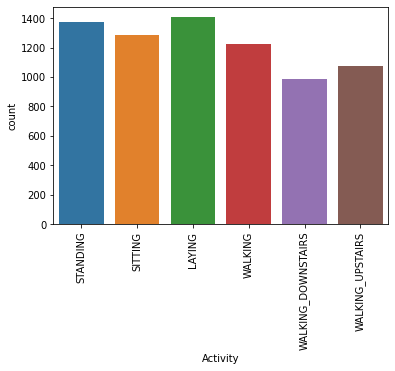

In [4]:
plt.figure()
sns.countplot(train.Activity)
plt.xticks(rotation=90)
plt.show()

/home/varshi/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


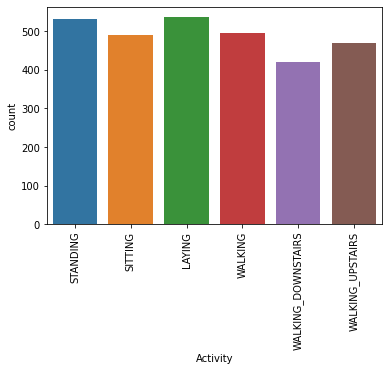

In [5]:
plt.figure()
sns.countplot(test.Activity)
plt.xticks(rotation=90)
plt.show()

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [9]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [10]:
Y_train = train['Activity'].copy() #Labels
X_train = train.drop('Activity',axis=1).copy() #Data

In [11]:
le= preprocessing.LabelEncoder()
le.fit(Y_train)

LabelEncoder()

In [12]:
sc = preprocessing.MinMaxScaler()
sc.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
X_train = sc.transform(X_train)
Y_train = le.transform(Y_train)

In [14]:
#print(y_train)

In [15]:
#print(X_train)

In [14]:
Y_test = test['Activity'].copy() #Labels
X_test = test.drop('Activity',axis=1).copy() #Data

In [15]:
X_test = sc.transform(X_test)
Y_test = le.transform(Y_test)

In [16]:
X_train.shape

(7352, 562)

In [17]:
X_test.shape

(2947, 562)

In [18]:
def seq_model():
    model = Sequential()
    model.add(Input(shape=(562,)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6,activation='softmax'))
    return model

In [19]:
def func_model():
    X = Input(shape=(562,))
    x = Dense(128,activation='relu')(X)
    x = Dense(64,activation='relu')(x)
    x = Dense(32,activation='relu')(x)
    Y = Dense(6,activation='softmax')(x)
    model = tf.keras.Model(X,Y)
    return model

In [21]:
m = seq_model()
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               72064     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 198       
Total params: 82,598
Trainable params: 82,598
Non-trainable params: 0
_________________________________________________________________


In [22]:
m.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
X_train.shape

(7352, 562)

In [24]:
n = func_model()
n.summary()
n.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 562)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               72064     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 82,598
Trainable params: 82,598
Non-trainable params: 0
_________________________________________________________________


In [25]:
m.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 3s 343us/sample - loss: 0.5854 - acc: 0.7628 - val_loss: 0.2610 - val_acc: 0.9050
Epoch 2/20
7352/7352 [==============================] - 3s 412us/sample - loss: 0.2260 - acc: 0.9170 - val_loss: 0.2174 - val_acc: 0.9148
Epoch 3/20
7352/7352 [==============================] - 3s 379us/sample - loss: 0.1532 - acc: 0.9452 - val_loss: 0.1528 - val_acc: 0.9393
Epoch 4/20
7352/7352 [==============================] - 3s 345us/sample - loss: 0.1405 - acc: 0.9472 - val_loss: 0.1559 - val_acc: 0.9396
Epoch 5/20
7352/7352 [==============================] - 3s 385us/sample - loss: 0.1176 - acc: 0.9524 - val_loss: 0.1868 - val_acc: 0.9284
Epoch 6/20
7352/7352 [==============================] - 3s 389us/sample - loss: 0.0968 - acc: 0.9640 - val_loss: 0.1955 - val_acc: 0.9298
Epoch 7/20
7352/7352 [==============================] - 3s 397us/sample - loss: 0.0954 - acc: 0.9661 - val_loss: 0.2359 - va

In [26]:
print(Y_test[20:50])

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
for i in range(20,50):
    Xnew = np.array([X_test[i]])
# make a prediction
    ynew = m.predict_classes(Xnew)
    print("Predicted:",ynew[0])
    print("Ground Truth:",Y_test[i])

Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 2
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 2
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 1
Ground Truth: 1
Predicted: 2
Ground Truth: 1


In [28]:
y_predm = m.predict(X_train)

In [29]:
y_predm = np.argmax(y_predm, axis=1)

In [30]:
print(confusion_matrix(Y_train,y_predm))

[[1407    0    0    0    0    0]
 [   0 1150  136    0    0    0]
 [   0    9 1365    0    0    0]
 [   0    0    0 1226    0    0]
 [   0    0    0    0  986    0]
 [   0    0    0    0    0 1073]]


In [31]:
print(classification_report(Y_train, y_predm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1407
           1       0.99      0.89      0.94      1286
           2       0.91      0.99      0.95      1374
           3       1.00      1.00      1.00      1226
           4       1.00      1.00      1.00       986
           5       1.00      1.00      1.00      1073

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352



In [32]:
n.fit(X_train, Y_train, batch_size=16, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 2s 337us/sample - loss: 0.4428 - acc: 0.8239 - val_loss: 0.2468 - val_acc: 0.9091
Epoch 2/20
7352/7352 [==============================] - 2s 316us/sample - loss: 0.1800 - acc: 0.9282 - val_loss: 0.1989 - val_acc: 0.9172
Epoch 3/20
7352/7352 [==============================] - 3s 387us/sample - loss: 0.1280 - acc: 0.9513 - val_loss: 0.2330 - val_acc: 0.9145
Epoch 4/20
7352/7352 [==============================] - 3s 390us/sample - loss: 0.1204 - acc: 0.9543 - val_loss: 0.1486 - val_acc: 0.9457
Epoch 5/20
7352/7352 [==============================] - 3s 362us/sample - loss: 0.0873 - acc: 0.9649 - val_loss: 0.2092 - val_acc: 0.9243
Epoch 6/20
7352/7352 [==============================] - 2s 335us/sample - loss: 0.0947 - acc: 0.9637 - val_loss: 0.3272 - val_acc: 0.8884
Epoch 7/20
7352/7352 [==============================] - 2s 273us/sample - loss: 0.0747 - acc: 0.9712 - val_loss: 0.2855 - va

In [33]:
y_predn = n.predict(X_test)

In [34]:
y_predn = np.argmax(y_predn, axis=1)

In [35]:
print(confusion_matrix(Y_test,y_predn))

[[537   0   0   0   0   0]
 [  0 458  31   0   0   2]
 [  0  36 496   0   0   0]
 [  0   0   0 491   3   2]
 [  0   0   0  19 383  18]
 [  0   0   0  27  11 433]]


In [36]:
print(classification_report(Y_test, y_predn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.93      0.93       491
           2       0.94      0.93      0.94       532
           3       0.91      0.99      0.95       496
           4       0.96      0.91      0.94       420
           5       0.95      0.92      0.94       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947

